## Notebook for Visualizations

In [83]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yaml 
from yaml.loader import UnsafeLoader
import seaborn as sns

import os

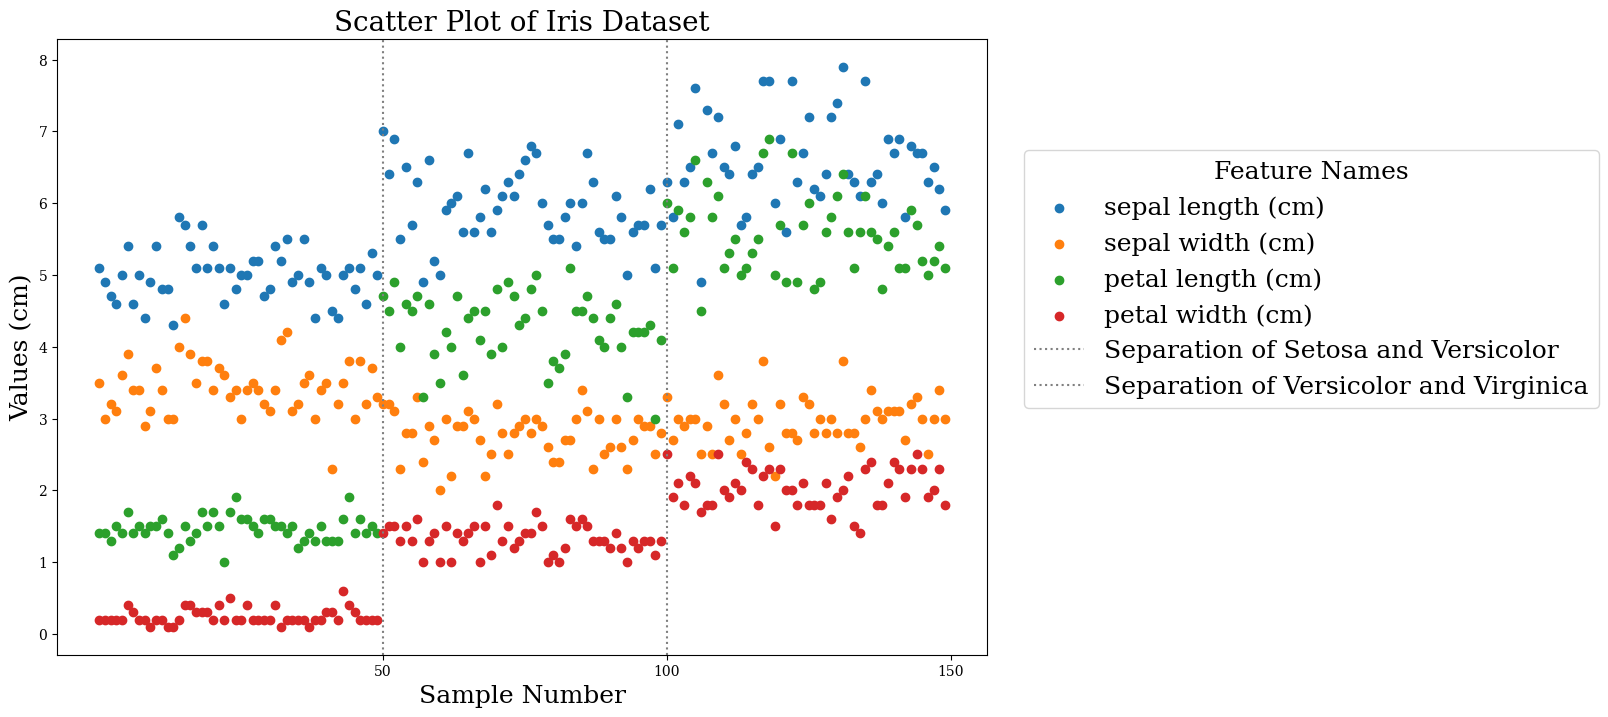

In [84]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

plt.rc("font", family="serif")


# Load the Iris dataset
iris = load_iris()

# Get the feature names and data
feature_names = iris['feature_names']
data = iris['data']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each feature with a different color
for i in range(data.shape[1]):
    ax.scatter(range(len(data)), data[:, i], label=feature_names[i])

# Add vertical lines at x=50 and x=100
ax.axvline(x=50, color='grey', linestyle=':', label='Separation of Setosa and Versicolor')
ax.axvline(x=100, color='grey', linestyle=':', label='Separation of Versicolor and Virginica')

# Set custom x-axis ticks at 50, 100, and 150
ax.set_xticks([50, 100, 150])

# Add labels and title with increased font size
ax.set(xlabel='Sample Number', ylabel='Values (cm)', title='Scatter Plot of Iris Dataset')
ax.set_xlabel('Sample Number', fontsize=18)  # Increase x-axis label font size
ax.set_ylabel('Values (cm)', fontsize=18)    # Increase y-axis label font size
ax.set_title('Scatter Plot of Iris Dataset', fontsize=20)  # Increase title font size

# Add legend with increased font size
ax.legend(title='Feature Names', fontsize=18,  title_fontsize=18,loc=(1.04, 0.4))
 # Increase legend title font size

# Show the plot
plt.show()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 1 2]
['setosa' 'versicolor' 'virginica']


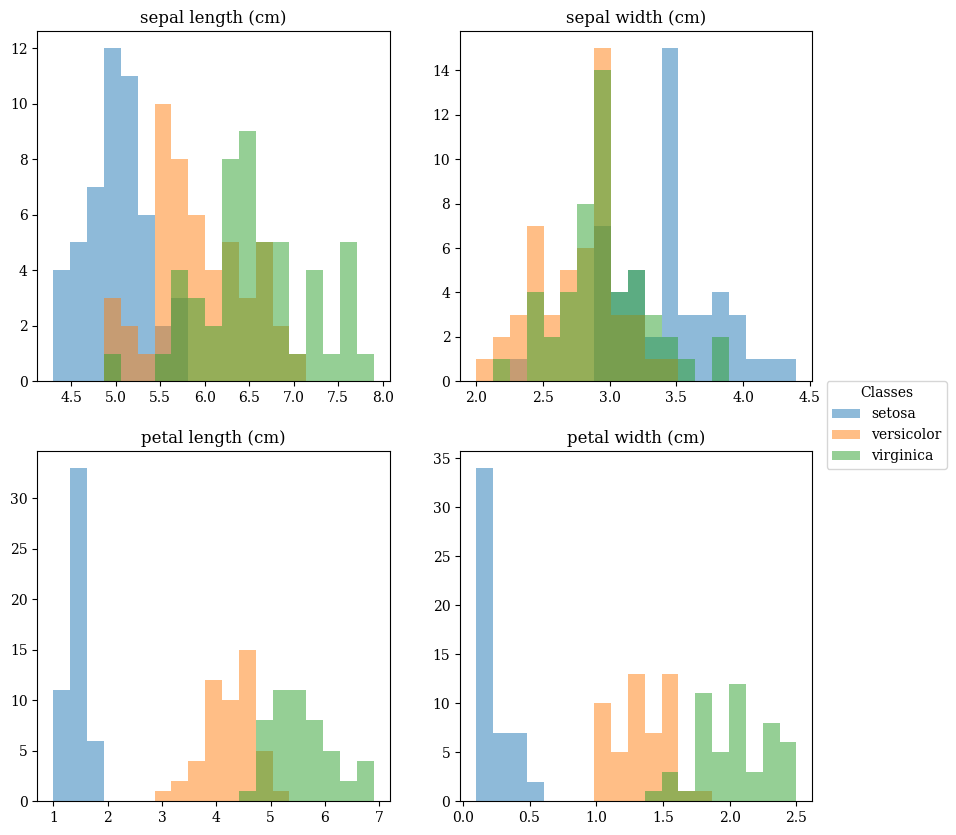

In [85]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()

data = dataset['data']
labels = dataset['target']
var_names = dataset['feature_names']
target_names = dataset['target_names']
print(var_names)
print(np.unique(labels))
print(target_names)

fig = plt.figure(figsize=(10,10))


# loop on variables
for i in range(4):
    # create subplot 
    
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend(loc=(1.04, 0.950), title="Classes")



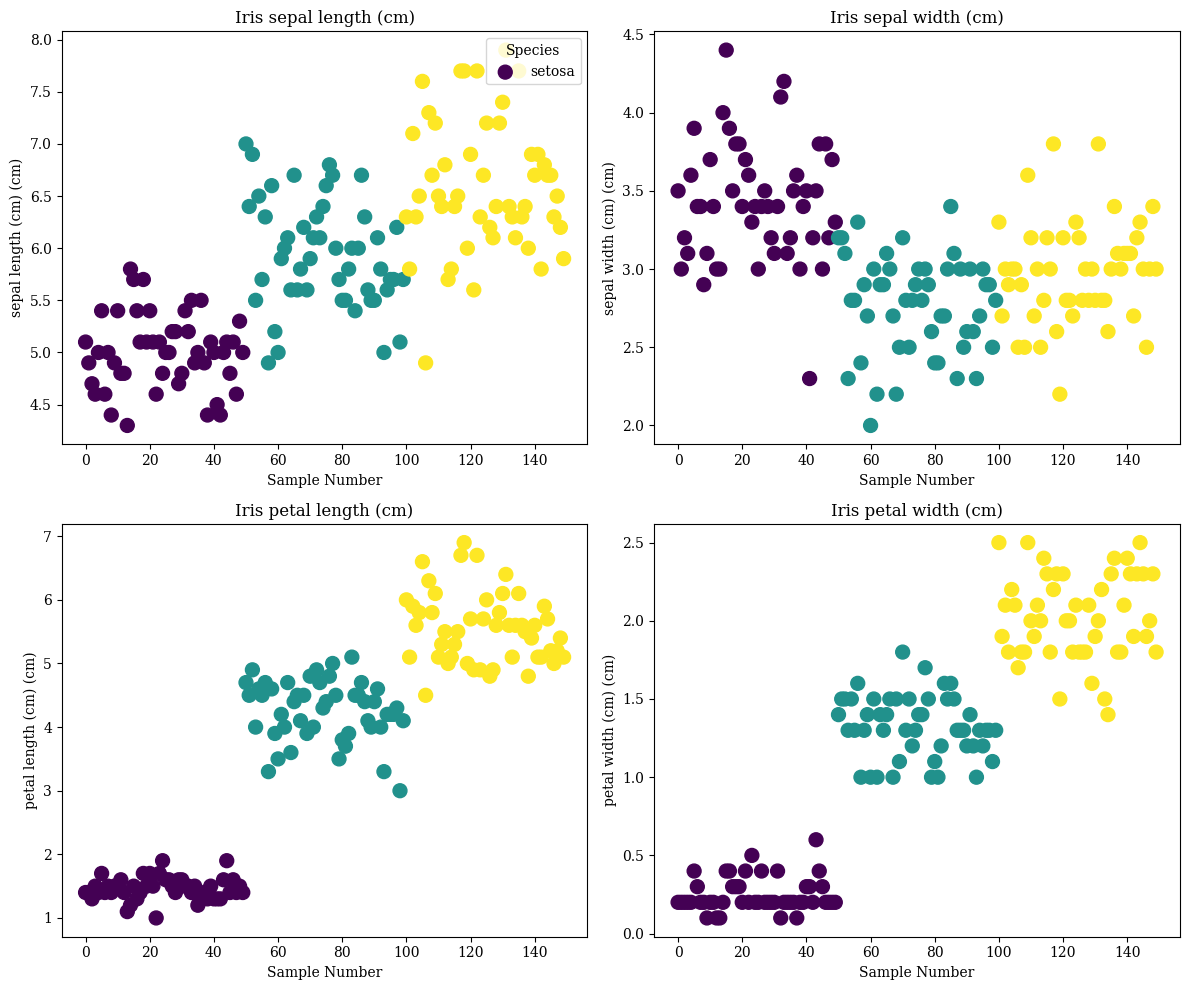

In [86]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Get the feature names
feature_names = iris['feature_names']

# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each feature and create scatter plots
for i, feature in enumerate(feature_names):
    axes[i].scatter(range(len(iris['data'])), iris['data'][:, i], c=iris['target'], cmap='viridis', s=100)
    axes[i].set(xlabel='Sample Number', ylabel=f'{feature} (cm)', title=f'Iris {feature}')

# Add a legend
legend_labels = [iris['target_names'][i] for i in range(len(iris['target_names']))]
axes[0].legend(legend_labels, title='Species', loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

          A         B  out
0  0.374540  0.642032    1
1  0.950714  0.084140    1
2  0.731994  0.161629    1
3  0.598658  0.898554    0
4  0.156019  0.606429    1
['A', 'B', 'out']


Text(0.5, 1.0, 'Scatter Plot of XOR dataset')

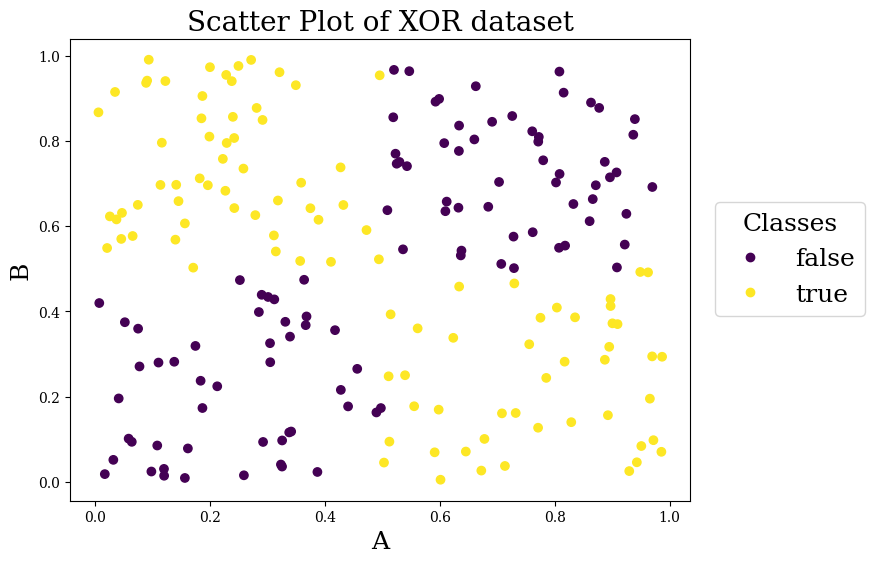

In [87]:
file_name = 'xor_df.csv'
relative_path =   '/../data'

plt.rc("font", family="serif")



# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
assert  os.path.exists(full_path), f'Path {relative_path}/{file_name} does not exist'

# read via panda reader
df = pd.read_csv(full_path)
df.shape
print(df.head())
target_feature = 'label'

cols = list(df.columns)
print(cols)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


_, ax = plt.subplots(figsize=(8, 6))# plt.subplots()
#colors = ['red','green']
scatter = ax.scatter(df["A"], df["B"], c=df.out)#cmap=matplotlib.colors.ListedColormap(colors))
ax.set(xlabel="A", ylabel="B")
ax.set_xlabel('A', fontsize=18)  # Increase x-axis label font size
ax.set_ylabel('B', fontsize=18)    # Increase y-axis label font size
_ = ax.legend(
    scatter.legend_elements()[0], ["false", "true"], loc=(1.04, 0.4), title="Classes",  fontsize=18,  title_fontsize=18
)
ax.set_title("Scatter Plot of XOR dataset", fontsize=20)


In [88]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()
dataset
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df = df.assign(Species= dataset['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
df["Species"] = df['Species'].where(df['Species'] != 0, 5 ) # own number to 5
df["Species"] = df['Species'].where(df['Species'] == 5, 0 ) # everything else to 0
df["Species"] = df['Species'].where(df['Species'] == 0, 1 ) # 5 to 0
#setosa_df = df.where(df['Species'] != 5., 1. )
print(df.iloc[89])

cor_mat = df.corr()
print("cor_mat",cor_mat)


# Create a DataFrame from the correlation matrix
df = pd.DataFrame(cor_mat)

df.rename(columns={"Species": "Setosa"})
# drop last row
df = df.iloc[:-1] # drop row
print("cor_mat",df)

# Select only the last column of the correlation matrix
last_column = df.iloc[:, -1]

# Create a DataFrame with only the last column
df_last_column_setosa = pd.DataFrame(last_column, columns=[last_column.name])

sepal length (cm)    5.5
sepal width (cm)     2.5
petal length (cm)    4.0
petal width (cm)     1.3
Species              0.0
Name: 89, dtype: float64
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Species                    -0.717416          0.603348          -0.922765   

                   petal width (cm)   Species  
sepal length (cm)          0.817941 -0.717416  
sepal width (cm)          -0.366126  0.603348  
petal length (cm)          0.962865 -0.922765  
petal width (cm)           1.000000 -0.887344  
Species                   -0.887344  1.000000  
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal 

In [90]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()
dataset
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df = df.assign(Species= dataset['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
df["Species"] = df['Species'].where(df['Species'] != 1, 5 ) # own number to 5
df["Species"] = df['Species'].where(df['Species'] == 5, 0 ) # everything else to 0
df["Species"] = df['Species'].where(df['Species'] == 0, 1 ) # 5 to 0
#setosa_df = df.where(df['Species'] != 5., 1. )
print(df.iloc[89])

cor_mat = df.corr()
print("cor_mat",cor_mat)


# Create a DataFrame from the correlation matrix
df = pd.DataFrame(cor_mat)

df.rename(columns={"Species": "Versicolor"})
# drop last row
df = df.iloc[:-1] # drop row
print("cor_mat",df)

# Select only the last column of the correlation matrix
last_column = df.iloc[:, -1]

# Create a DataFrame with only the last column
df_last_column_versi = pd.DataFrame(last_column, columns=[last_column.name])

sepal length (cm)    5.5
sepal width (cm)     2.5
petal length (cm)    4.0
petal width (cm)     1.3
Species              1.0
Name: 89, dtype: float64
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Species                     0.079396         -0.467703           0.201754   

                   petal width (cm)   Species  
sepal length (cm)          0.817941  0.079396  
sepal width (cm)          -0.366126 -0.467703  
petal length (cm)          0.962865  0.201754  
petal width (cm)           1.000000  0.117899  
Species                    0.117899  1.000000  
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal 

In [92]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()
dataset
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df = df.assign(Species= dataset['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


sepal length (cm)    5.5
sepal width (cm)     2.5
petal length (cm)    4.0
petal width (cm)     1.3
Species              0.0
Name: 89, dtype: float64
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Species                     0.638020         -0.135645           0.721011   

                   petal width (cm)   Species  
sepal length (cm)          0.817941  0.638020  
sepal width (cm)          -0.366126 -0.135645  
petal length (cm)          0.962865  0.721011  
petal width (cm)           1.000000  0.769445  
Species                    0.769445  1.000000  
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal 

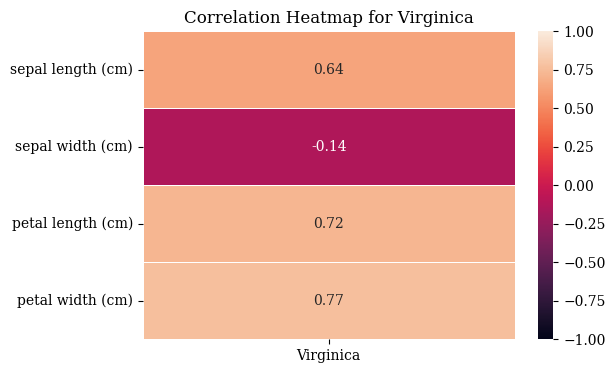

In [93]:
# a very weird way of setting all setosa entries in species to 1 and all other to 0
# note pd where works diff to np where
# everything that is false gets replaced
df["Species"] = df['Species'].where(df['Species'] != 2, 5 ) # own number to 5
df["Species"] = df['Species'].where(df['Species'] == 5, 0 ) # everything else to 0
df["Species"] = df['Species'].where(df['Species'] == 0, 1 ) # 5 to 0
#setosa_df = df.where(df['Species'] != 5., 1. )
print(df.iloc[89])

cor_mat = df.corr()
print("cor_mat",cor_mat)


# Create a DataFrame from the correlation matrix
df = pd.DataFrame(cor_mat)


# drop last row
df = df.iloc[:-1] # drop row
print("cor_mat",df) 

df = df.rename(columns={"Species": "Virginica"})

# Select only the last column of the correlation matrix
last_column = df.iloc[:, -1]

# Create a DataFrame with only the last column
df_last_column_virgi = pd.DataFrame(last_column, columns=[last_column.name])

# # Create a heatmap using seaborn for the last column
plt.figure(figsize=(6, 4))
sns.heatmap(df_last_column_virgi, vmin=-1, vmax=1,annot=True, fmt=".2f", linewidths=.5)
plt.title(f'Correlation Heatmap for Virginica')
plt.show()

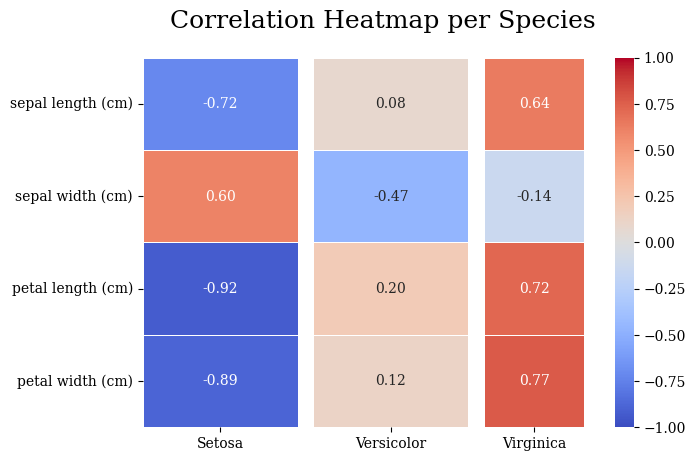

In [94]:

plt.rc("font", family="serif")

fig, ax =plt.subplots(1,3)#,  figsize=(15, 5))

sns.heatmap(df_last_column_setosa, ax=ax[0], vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False, xticklabels=["Setosa"])
sns.heatmap(df_last_column_versi, ax=ax[1], vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False, yticklabels=False, xticklabels=["Versicolor"]  )
sns.heatmap(df_last_column_virgi, ax=ax[2],vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, yticklabels=False, xticklabels=["Virginica"],  cbar_kws={"pad":0.2})

plt.subplots_adjust(wspace=0.1)
plt.suptitle("Correlation Heatmap per Species", fontsize=18)

plt.show()

          A         B  out
0  0.374540  0.642032    1
1  0.950714  0.084140    1
2  0.731994  0.161629    1
3  0.598658  0.898554    0
4  0.156019  0.606429    1
['A', 'B', 'out']


Text(0.5, 1.0, 'Scatter Plot of XOR dataset')

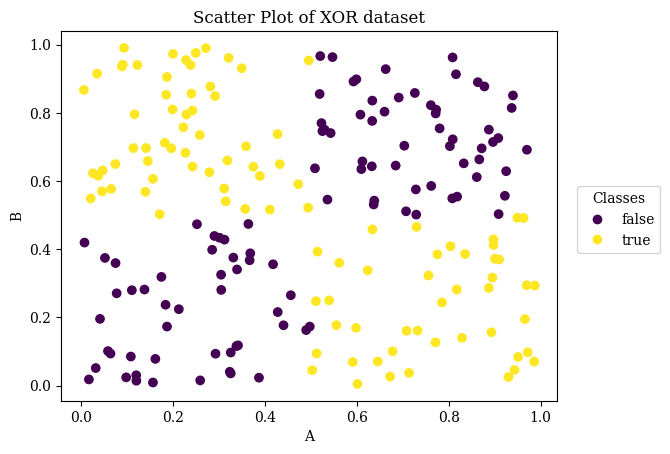

In [95]:
file_name = 'xor_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
assert  os.path.exists(full_path), f'Path {relative_path}/{file_name} does not exist'

# read via panda reader
df = pd.read_csv(full_path)
df.shape
print(df.head())
target_feature = 'label'

cols = list(df.columns)
print(cols)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots()
#colors = ['red','green']
scatter = ax.scatter(df["A"], df["B"], c=df.out)#cmap=matplotlib.colors.ListedColormap(colors))
ax.set(xlabel="A", ylabel="B")
_ = ax.legend(
    scatter.legend_elements()[0], ["false", "true"], loc=(1.04, 0.4), title="Classes", 
)
ax.set_title("Scatter Plot of XOR dataset")

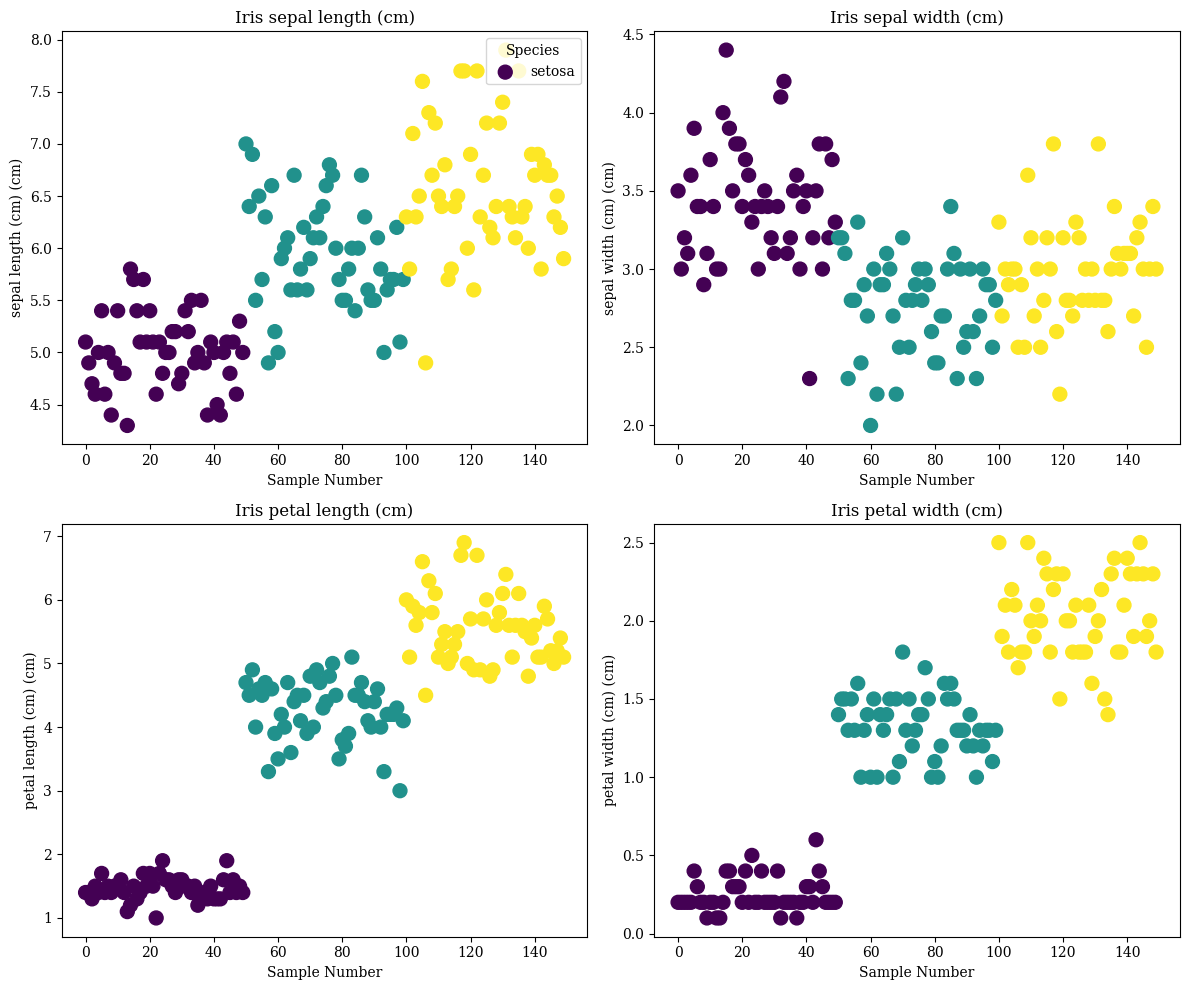

In [96]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Get the feature names
feature_names = iris['feature_names']

# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each feature and create scatter plots
for i, feature in enumerate(feature_names):
    axes[i].scatter(range(len(iris['data'])), iris['data'][:, i], c=iris['target'], cmap='viridis', s=100)
    axes[i].set(xlabel='Sample Number', ylabel=f'{feature} (cm)', title=f'Iris {feature}')

# Add a legend
legend_labels = [iris['target_names'][i] for i in range(len(iris['target_names']))]
axes[0].legend(legend_labels, title='Species', loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

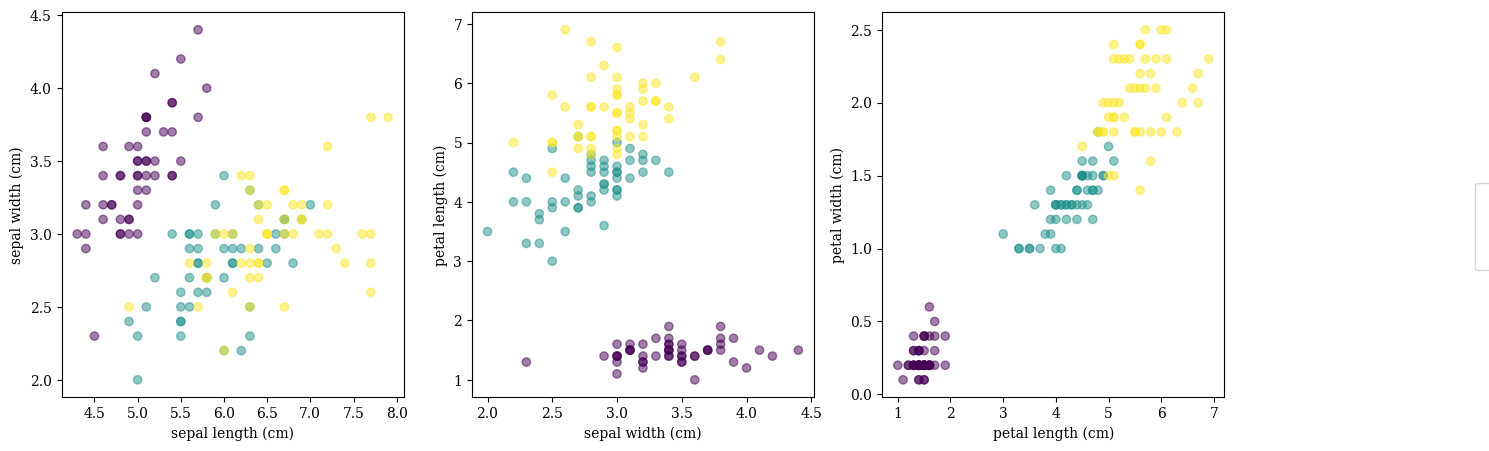

In [97]:


fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    j = i+1
    # we plot variable 1 vs 0, then 2 vs 1, then 3 vs 2
    scatter = axs[i].scatter(data[:,i], data[:, j], c=labels, alpha=0.5)
    axs[i].set_xlabel(var_names[i])
    axs[i].set_ylabel(var_names[j])
elems = list(scatter.legend_elements())
# by default, the legend labels are the values 
# of the target, 0, 1, 2. 
# we replace that with the target names:
elems[1] = target_names
fig.legend(*elems, loc=(0.99, 0.4), title="Classes")


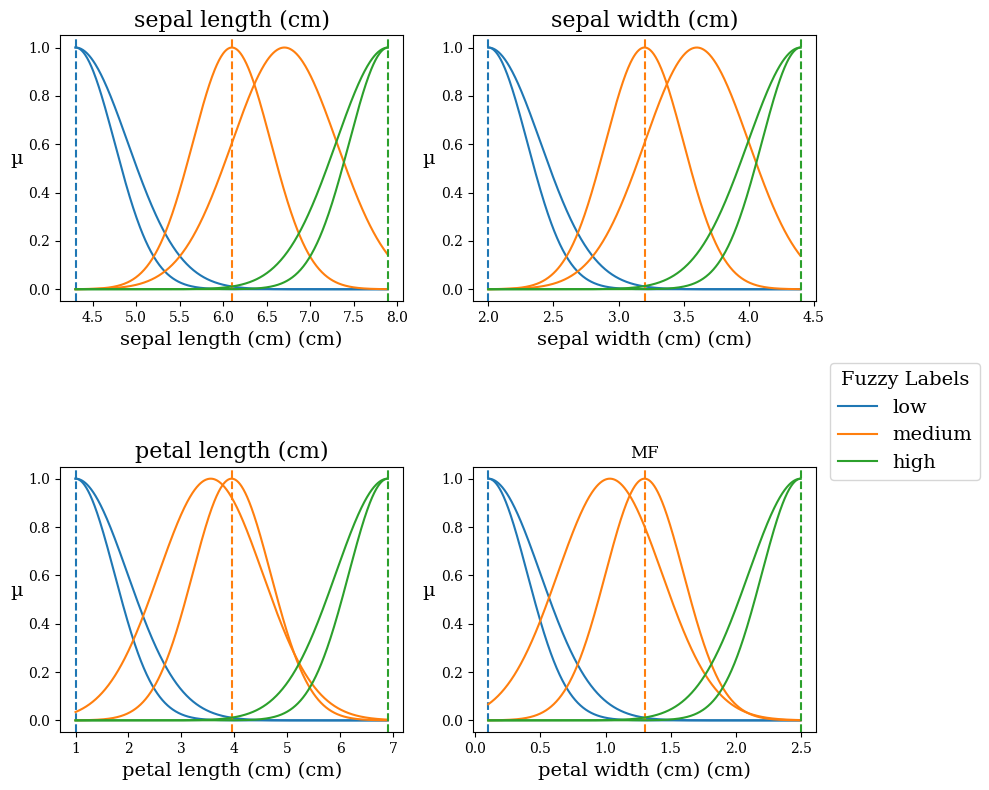

In [105]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
n_mfs = 3
mf_names = ["low", "medium", "high"]

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5 * (((x - center) / width) ** 2))
    return mu

min_vals = [4.3, 2.0, 1.0, 0.1]
max_vals = [7.9, 4.4, 6.9, 2.5]

centers = [4.3, 6.1, 7.9, 2.0, 3.2, 4.4, 1.0, 3.95, 6.9, 0.1, 1.3, 2.5]
widths = [0.45, 0.45, 0.45, 0.3, 0.3, 0.3, 0.7375, 0.7375, 0.7375, 0.3, 0.3, 0.3]

centers_tuned = [4.3, 6.704846154261173, 7.9, 2.0, 3.6010828440215126, 4.4, 1.0, 3.55364431399976, 6.9, 0.1, 1.0335289816510311, 2.5]
widths_tuned = [0.6022029347908475, 0.6032757097365787, 0.600860621908211, 0.40183876031762733, 0.4004111866011534, 0.407176726321751, 0.9833581724440803, 0.9843501545777336, 0.9849394498355075, 0.4004809656094499, 0.40114355348347314, 0.40233177014329013]

c = np.array_split(centers, len(feature_names))
w = np.array_split(widths, len(feature_names))
c_t = np.array_split(centers_tuned, len(feature_names))
w_t = np.array_split(widths_tuned, len(feature_names))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Set figsize for a 2x2 grid layout

for xID, max_value in enumerate(max_vals):
    x = np.arange(min_vals[xID], max_value, max_value / 1000)
    row = xID // 2
    col = xID % 2
    
    for mfID in range(n_mfs):
        y = MF_gaussian(x, c[xID][mfID], w[xID][mfID])
        z = MF_gaussian(x, c_t[xID][mfID], w_t[xID][mfID])
        axs[row, col].plot(x, y, label=mf_names[mfID])
        axs[row, col].plot(x, z,  c=axs[row, col].lines[-1].get_color())
        axs[row, col].axvline(c[xID][mfID], 0, 1, c=axs[row, col].lines[-1].get_color(), ls='--')

    #axs[row, col].legend(loc=(0.0, -0.4), title="Fuzzy Labels", mode="expand", borderaxespad=0, ncol=3, fontsize=14, title_fontsize=14)
    axs[row, col].set_title(f'{feature_names[xID]}', fontsize=16)
    axs[row, col].set_ylabel('µ', fontsize=14, rotation='horizontal', ha='right')
    axs[row, col].set_xlabel(f'{feature_names[xID]} (cm)', fontsize=14)

plt.legend(loc=(1.04, 0.950), title="Fuzzy Labels", fontsize=14, title_fontsize=14)
plt.title("MF")
plt.tight_layout()
plt.show()


In [100]:
def center_init(x, n_mfs):
    """Initializes the centers of MFs by partitioning the domain of the features

    Args:
        x (numpy.ndarray): the max values for each feature, i.e. the domain
        n_mfs (int): number of MFs in Fuzzification Layer
        
    Returns: 
        numpy.ndarray: initalized widths with the shape (x.size,)
    """
   # n_inputs = x.size // n_mfs
    multiplicator = np.tile(np.arange(0, n_mfs ), 1)
    cetnters = (x / (n_mfs -1)) * multiplicator
  #  print(cetnters)
    return cetnters


def widths_init(x, n_mfs):
    """Initializes the widths of MFs by partitioning the domain of the features

    Args:
        x (numpy.ndarray): the max values for each feature, i.e. the feature's domain
        n_mfs (int): number of MFs in Fuzzification Layer

    Returns: 
        numpy.ndarray: initalized widths with the shape (x.size,)
    """
    return np.repeat(x/(2*n_mfs+1), n_mfs)   

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5*(((x-center)/width)**2))
    
    return mu

centers [0.14285714 0.14285714 0.14285714]
honk 0.14285714285714285
honk 0.14285714285714285
honk 0.14285714285714285


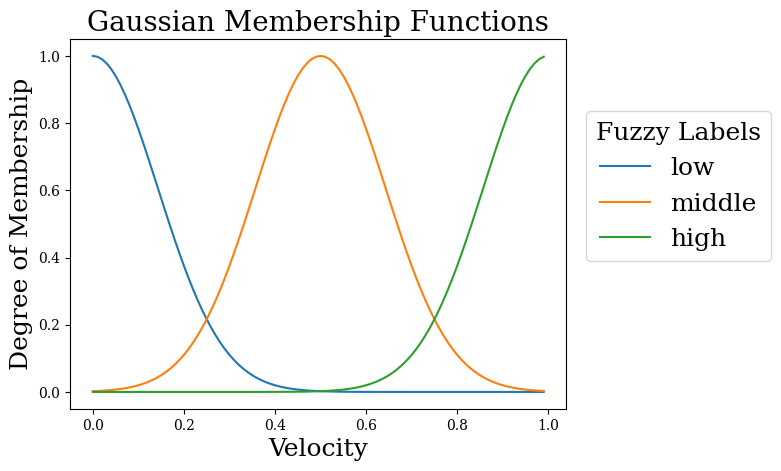

In [101]:
# from cycler import cycler

# line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
#                  cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
# marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
#                  cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
#                  cycler(marker=["4", "2", "3", "1", "+", "x", "."]))

# # matplotlib's standard cycler
# standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# plt.rc("axes", prop_cycle=line_cycler)

# plt.rc("text", usetex=True)
# #plt.rc("text.latex", preamble=r"\usepackage{newpxtext}\usepackage{newpxmath}\usepackage{commath}\usepackage{mathtools}")
# plt.rc("font", family="serif", size=18.)

plt.rc("font", family="serif")

 

max_vals = 1
centers = center_init(1,3)

widths = widths_init(1,3)
print("centers", widths)

centers_tuned = [ 4.3
,6.704846154261173
,7.9
,2.0
,3.6010828440215126
,4.4
,1.0
,3.55364431399976
, 6.9
, 0.1
, 1.0335289816510311
, 2.5]



widths_tuned = [ 0.6022029347908475
,0.6032757097365787
,0.600860621908211
, 0.40183876031762733
, 0.4004111866011534
, 0.407176726321751
, 0.9833581724440803
, 0.9843501545777336
, 0.9849394498355075
, 0.4004809656094499
, 0.40114355348347314
, 0.40233177014329013]



def visuMFs( max_value, mf_names=["low", "middle", "high"]):
    """Visualizing the current MFs
visuMFs(inputMFs, self.arc, dir="before_training", func="inputMFs")
inputMFs.mf_type, inputMFs.n_mfs, inputMFs.centers, inputMFs.widths, inputMFs.domain_input, 
Args:
        type_mf (callable): MF
        n_mfs (int): number of MFs
        centers (tensor): centers of MFs
        widths (tensor): widths of MF
        domain_input (int): upper boundary of the domain of the input 
        file_name (str): name of plot that will be saved in analysis folder 
    """
    n_mfs = 3
    


    x = np.arange(0, max_value, 0.01)
    y = {}
    z = {}

    for mfID in range(n_mfs):
        print("honk",widths[mfID])
        y[mfID] = []#MF_gaussian(x,centers[mfID],widths[mfID])
        z[mfID] = []

        for bleh in x:
             y[mfID].append(MF_gaussian(bleh,centers[mfID],widths[mfID]))
             #z[mfID].append(MF_gaussian(bleh,centers_tuned[mfID],widths_tuned[mfID]))

        plt.plot(x, y[mfID], label=mf_names[mfID])
       # plt.plot(x, z[mfID], label=mf_names[mfID])

        #  print("hui", c[xID][mfID])
      #  plt.axvline(0.3,0,0.39, c="red", ls='--')


        # plt.legend(loc=(0.0, -0.4), title="Fuzzy Labels",# bbox_to_anchor=( 1, 0.2), 
        #         mode="expand", borderaxespad=0, ncol=3, fontsize=18,  title_fontsize=18)#, **csfont)
        
        plt.legend(loc=(1.04, 0.4), title="Fuzzy Labels",# bbox_to_anchor=( 1, 0.2), 
               fontsize=18,  title_fontsize=18)

        plt.title('Gaussian Membership Functions', fontsize=20)
        plt.ylabel('Degree of Membership', fontsize=18)
        plt.xlabel("Velocity",  fontsize=18)
    #plt.savefig("myimage.jpg", dpi=1200)
    return plt



      
plt = visuMFs(max_vals)
#plt.figure(figsize=(10,6))
plt.savefig("myimage.jpg", dpi=1200)
plt.show()